In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

In [2]:
l2016 = [
    "../output/dateper_2017_1.csv",
    "../output/dateper_2017_2.csv",
    "../output/dateper_2017_3.csv",
]

In [3]:
#dfy = pd.read_csv("../output/dateper_2017_4.csv")

In [4]:
#dfy.drop_duplicates(subset="idp")

In [5]:
df2016 = pd.concat([pd.read_csv(n) for n in l2016])

In [6]:
df2016.shape

(20070, 4)

In [7]:
dff = df2016.loc[df2016["Name"]=="Flor de Bastion",:]

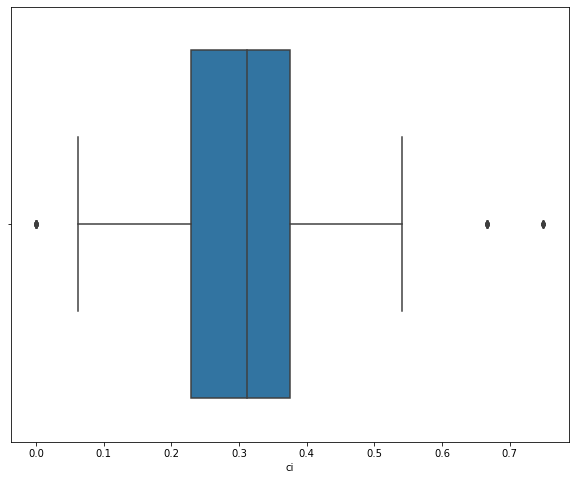

In [8]:
f,ax = plt.subplots(figsize=(10,8))
sbn.boxplot(x=dff["ci"])

In [9]:
dft = df2016.groupby("Name").apply(lambda x : list(np.average(x["ci"],weights=x["fexp"],returned=True))).reset_index()

In [10]:
dft[["ipm","pop"]] = dft[0].apply(pd.Series)

In [11]:
dft.drop(columns=0,inplace=True)

In [12]:
dft = dft.sort_values(by="ipm",ascending=False)

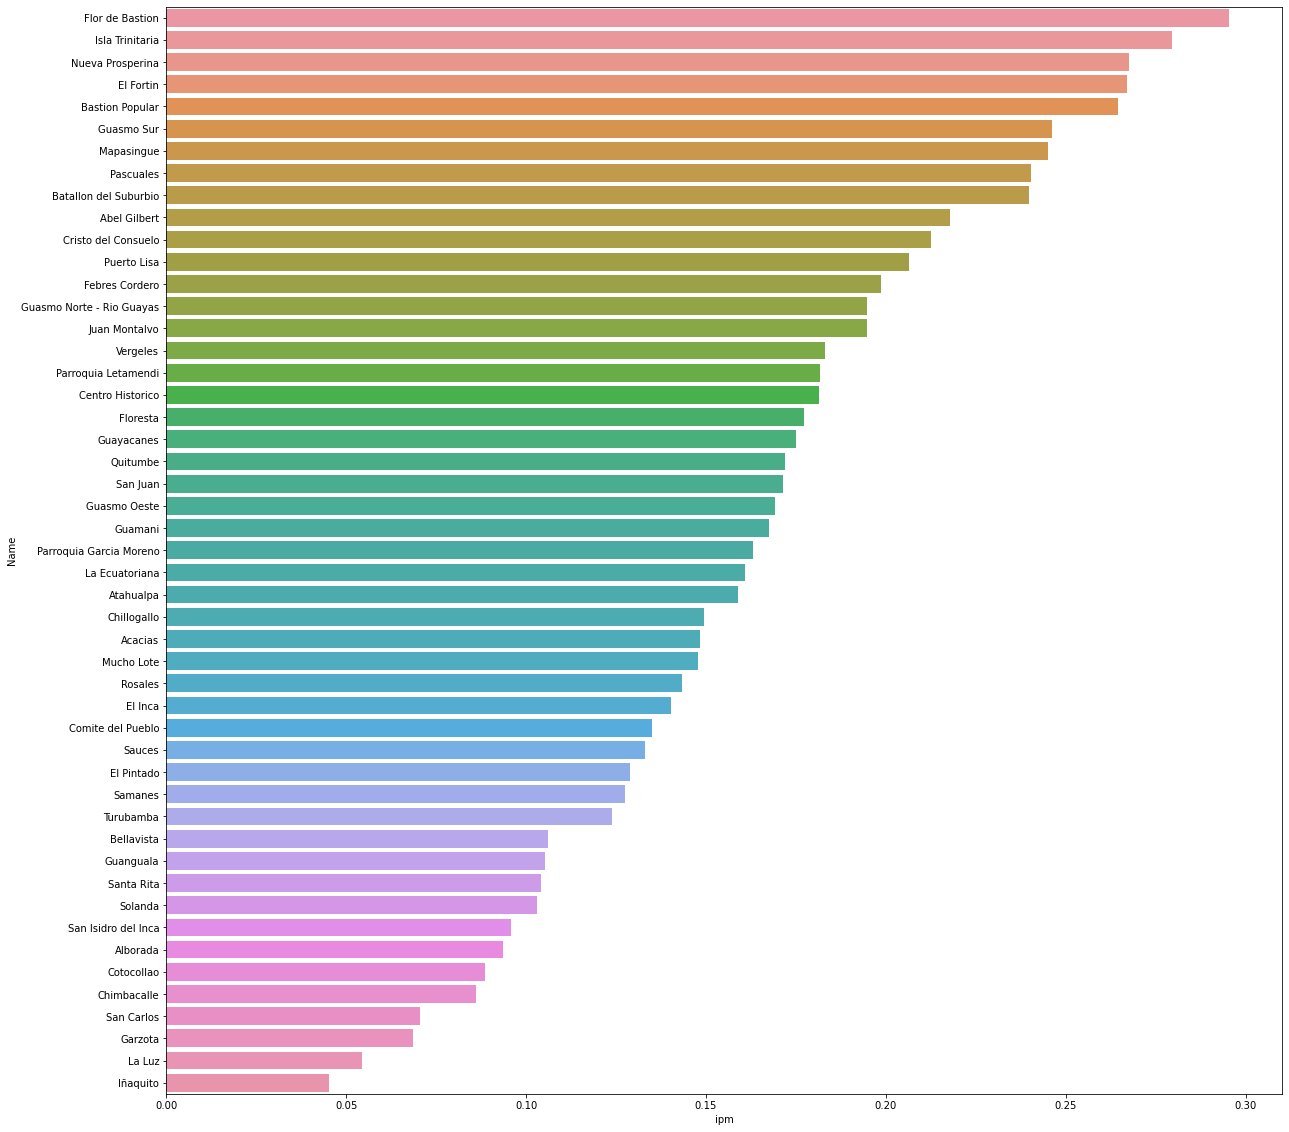

In [13]:
f,ax = plt.subplots(figsize=(20,20))
sbn.barplot(data=dft, x="ipm", y="Name")

In [15]:
dft.to_csv("../output/ipm_2017.csv",index=False)